In [79]:
import glob
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=3.0)

# Concatanate the data

In [222]:
# Set which param
delay_mode_intra = "null"
delay_mode_inter = "unimodal"
intra_params = [1.5]
inter_params = [1.5]
v_stim = 4.0
metric = "training"  # statistics or classification?
networks = ["topo", "random"]

# Control condition
dfs = []
df = pd.read_csv('data/sum/diff_v_stim/{}_v_stim.csv'.format(metric), keep_default_na=False)

df = df[df['v_stim']==v_stim].drop(columns=['v_stim'])  # only those with v_stim=4
df["intra type"] = delay_mode_intra
df["inter type"] = delay_mode_inter
df["intra params"] = "null"
df["inter params"] = "null"
df['double conn'] = 'null'
df['skip delays'] = 'null'
df['skip weights'] = 'null'
dfs.append(df)

# add all the other datas
for network_mode in networks:
    for intra_p in intra_params:
        for inter_p in inter_params:
            # skip connections params
            for skip_double in [str(True), str(False)]:
                for skip_p in [1.5, 3.0]:
                    for skip_w in [1.0, 0.5]:
                        df = pd.read_csv('data/sum/{}_{}_intra={}{}_inter={}{}_skip_double={}_d={}_w={}.csv'.
                                         format(metric, network_mode, delay_mode_intra, intra_p, delay_mode_inter, inter_p, skip_double, skip_p, skip_w))
                        df["intra type"] = delay_mode_intra
                        df["inter type"] = delay_mode_inter
                        df["intra params"] = intra_p
                        df["inter params"] = inter_p
                        df['double conn'] = skip_double
                        df['skip delays'] = skip_p
                        df['skip weights'] = skip_w
                        dfs.append(df)

# # noise condition does not depend on v_stim
# df = pd.read_csv('data/sum/pre/{}_intra={}_inter={}.csv'.format(metric, delay_mode_intra, delay_mode_inter),
#                  keep_default_na=False)
# df = df[df['network type']=='noise']
# dfs.append(df)

# concatenate all dataframes into one and save them
ultimate = pd.concat(dfs, sort=False)
ultimate.to_csv("data/sum/{}_intra={}_inter={}.csv".format(metric, delay_mode_intra, delay_mode_inter), index=False)

# Plot

1) Load the data

In [217]:
df = pd.read_csv('data/sum/v_stim=4/training_intra=unimodal_inter=unimodal.csv', keep_default_na=False)

2) melt them in a necessary format

In [218]:
melted = df.melt(id_vars=['module index', 'network type', 
                          'intra type', 'inter type', 'intra params', 'inter params'],
#                           'double conn', 'skip delays', 'skip weights'], 
                 var_name='metric')  # id_vars keep their column, other columns get melted under the column @var_name

3) Select which variables you want to plot

In [219]:
selected = melted[(melted['module index']>1) & (melted['metric']=='accuracy')]
# selected = melted

In [220]:
rename = 'intra params'
name_to = '$\sigma$'
selected = selected.rename(columns={rename:name_to}, errors='raise')

# selected[name_to] = selected[name_to].replace('null', 0)  # map params to 0
# # selected[name_to] = pd.to_numeric(selected[name_to], errors='raise')  # make the hue variable numeric
# selected[name_to] = selected[name_to].map({'True':'double', 'False':'single', 'null':'none'})  # skip connections

In [221]:
selected

,module index,network type,intra type,inter type,$\sigma$,inter params,metric,value
4,2,topo,unimodal,unimodal,null,null,accuracy,0.989
5,2,topo,unimodal,unimodal,null,null,accuracy,0.984
6,3,topo,unimodal,unimodal,null,null,accuracy,0.743
7,3,topo,unimodal,unimodal,null,null,accuracy,0.746
12,2,random,unimodal,unimodal,null,null,accuracy,0.130
13,2,random,unimodal,unimodal,null,null,accuracy,0.131
14,3,random,unimodal,unimodal,null,null,accuracy,0.083
15,3,random,unimodal,unimodal,null,null,accuracy,0.109
20,2,topo,unimodal,unimodal,0.5,0.5,accuracy,0.994
21,2,topo,unimodal,unimodal,0.5,0.5,accuracy,0.991


## Network dynamics

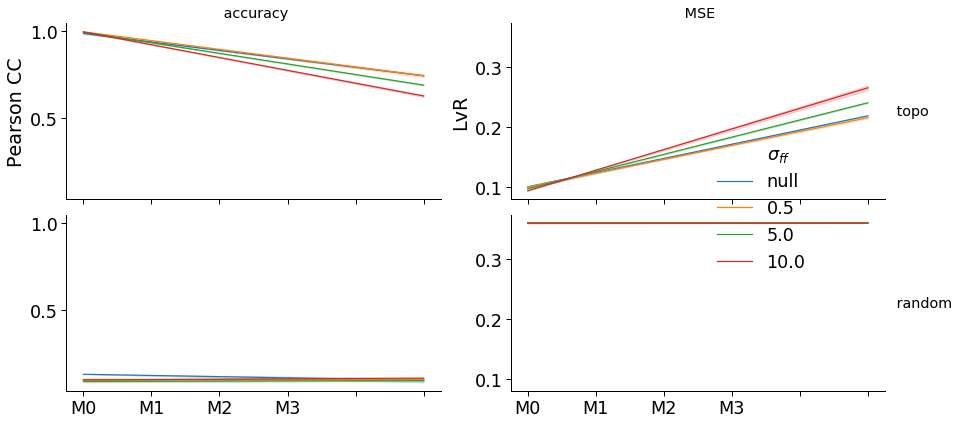

In [21]:
g = sns.FacetGrid(selected, col="metric", row="network type",
                  sharex=True, sharey='col', margin_titles=True, aspect=2)
g = g.map_dataframe(sns.lineplot, "module index", 'value', hue=name_to, legend='full')

# ticks and labels
metrics = df.columns[1:] 
xticks = [None, 'M0', 'M1',"M2", "M3"]
ylabels = ["Pearson CC", "LvR", "spikes/sec", "Fano factor"]  # ylabels are units of metrics

# ticks and labels
# https://cduvallet.github.io/posts/2018/11/facetgrid-ylabel-access
for ax in g.axes.flat:
    ax.set(xlabel=None, xticklabels=xticks, ylabel=None)
    if ax.get_title():
        ax.set_title(ax.get_title().split('=')[1],
                     fontsize='x-large')
    if ax.texts:
        txt = ax.texts[0]
        ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
                txt.get_text().split('=')[1],
                transform=ax.transAxes,
                va='center',
                fontsize='x-large')
        # Remove the original text
        ax.texts[0].remove()
# ylabel for metrics
for axi,ax in enumerate(g.axes[0]):
    ax.set(ylabel=ylabels[axi])
    

# # legends
# handles, labels = g.axes[0][-1].get_legend_handles_labels()
# g.axes[0][-1].legend(handles=handles[:], labels=labels[:], bbox_to_anchor=(1.0, 1.0))
g.add_legend(bbox_to_anchor=(0.85, 0.5))

# save the figure
g.fig.tight_layout()
# plt.savefig("ultimate_uni_delays=1.5_weights=1_conns.pdf", bbox_to_inches="tight")

## Classification

4-1) Plot with FacetGrid

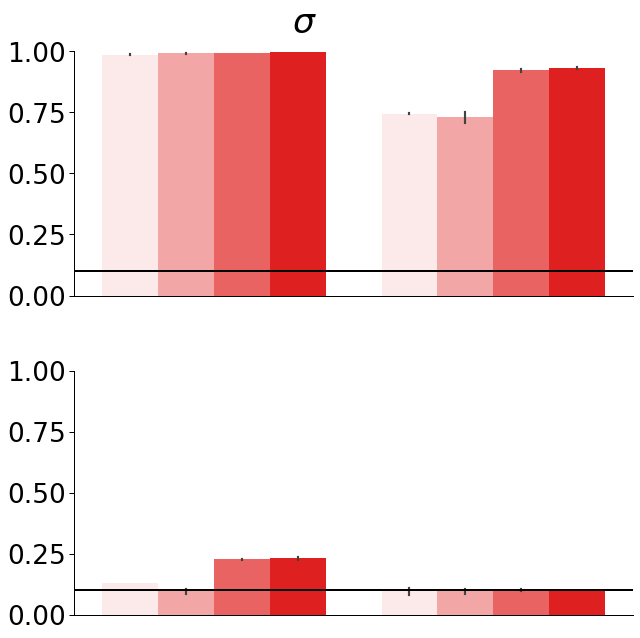

In [223]:
# create a 2x2 grid with row being the [accuracy, MSE] and column being [topo, random]
g = sns.catplot(x="module index", y="value", hue=name_to, data = selected,
            kind='bar', row='network type', sharey='row', margin_titles=False,
            ci='sd', aspect=2.0, color='red', legend=False)

# ticks, labels...
# g.fig.text(0, 0.5,'MSE', va='center', rotation='vertical')
g.fig.suptitle(name_to)
g.set(xlabel=None, xticks=[], ylabel=None, title=None, ylim=[0,1])
# namelist = ['topo', 'random']
for i,ax in enumerate(g.axes):
    ax[0].axhline(y=0.1, color='black', linewidth=2.0)
#     ax[0].set_ylabel(namelist[i])
# xticks= ['M2', 'M3']
# g.axes[1,0].set(xticks=range(2), xticklabels=xticks)

# xticks = ["M2", "M3"]
# g.set(xlabel=None)
# for ax in g.axes[0]:
#     ax.set(xticks=range(2), xticklabels=xticks)
#     ax.axhline(y=0.1, color='black', linewidth=2.0)  # accuracy of 0.1 is at chance level
# for ax in g.axes.flat:
#     ax.set(xlabel=None, xticklabels=xticks, ylabel=None)
#     if ax.get_title():
#         ax.set_title(ax.get_title().split('=')[1],
#                      fontsize='x-large')
#     if ax.texts:
#         txt = ax.texts[0]
#         ax.text(txt.get_unitless_position()[0], txt.get_unitless_position()[1],
#                 txt.get_text().split('=')[1],
#                 transform=ax.transAxes,
#                 va='center',
#                 fontsize='x-large')
#         # Remove the original text
#         ax.texts[0].remove()

# save the figure
# g.fig.tight_layout()
plt.savefig('accuracy_uniuni.eps', bbox_to_inches='tight')

4-2) Or only just a single pot

In [ ]:
sns.barplot(x='module index', y='accuracy', hue='double conn', data=df[(df['module index'] >1) & (df['network type']=='random')])

xticks = ["M2", "M3"]
plt.xticks(range(2), xticks)
plt.axhline(y=0.1, color='black', linewidth=2.0)

plt.savefig('training_random_double.pdf', bbox_to_inches='tight')

# Errthing

In [4]:
'''
load data, compute average across trials and merge statistics with classification results
'''
measures = pd.read_csv('data/measures_errthing.csv', keep_default_na=False)
classi = pd.read_csv('data/training_errthing.csv', keep_default_na=False)
groupy = lambda df:df.groupby(['module index', 'network type', 'intra type', 'inter type', 'intra params', 'inter params']).mean()
measures_g = groupy(measures)
classi_g = groupy(classi)
df_joined = classi_g.join(measures_g, lsuffix='!')

In [5]:
selected = df_joined.loc[(2,'random')]  # select module and network type
selected = selected.reset_index()  # delete multiIndex structure

def transform_rows_delay (row):
    '''
    aux function to use combinations of intra type and inter type to determine the delay type
    '''
    if (row['intra params']=='null'):
        return 'null'
    elif (row['intra type']=='null') and (row['inter type']=='unimodal'):
        return 'inter'
    elif (row['intra type']=='unimodal') and (row['inter type']=='null'):
        return 'intra'
    else:
        return 'both'

selected['delay type'] = selected.apply(lambda row:transform_rows_delay(row), axis=1)  # add the delay type column
selected = selected.drop(columns=['intra type', 'inter type'])  # drop redundant columns

In [6]:
selected

,intra params,inter params,Unnamed: 0!,accuracy,MSE,Unnamed: 0,synchrony,irregularity,firing rate,variability,delay type
0,1.5,0.5,44.5,0.1005,0.360033,110,0.083175,1.242206,3.170182,8.435313,inter
1,1.5,10.0,60.5,0.0980,0.360090,150,0.010910,1.532495,2.916002,1.251371,inter
2,1.5,5.0,52.5,0.0890,0.360089,130,0.031001,1.436319,2.950268,4.298904,inter
3,null,null,12.5,0.1305,0.359415,30,0.102346,1.192047,3.393392,10.045327,null
4,0.5,1.5,44.5,0.1015,0.360152,110,0.074555,1.251966,3.078592,6.742603,intra
5,10.0,1.5,60.5,0.2970,0.343846,150,0.337375,0.632046,7.948538,38.530370,intra
6,5.0,1.5,52.5,0.3120,0.342377,130,0.225493,0.744249,5.934898,25.848010,intra
7,null,null,12.5,0.1305,0.359415,30,0.102346,1.192047,3.393392,10.045327,null
8,0.5,0.5,44.5,0.0955,0.360108,110,0.062544,1.260764,3.076788,6.178627,both
9,10.0,10.0,60.5,0.2310,0.354286,150,0.069831,0.997593,4.121390,11.948267,both


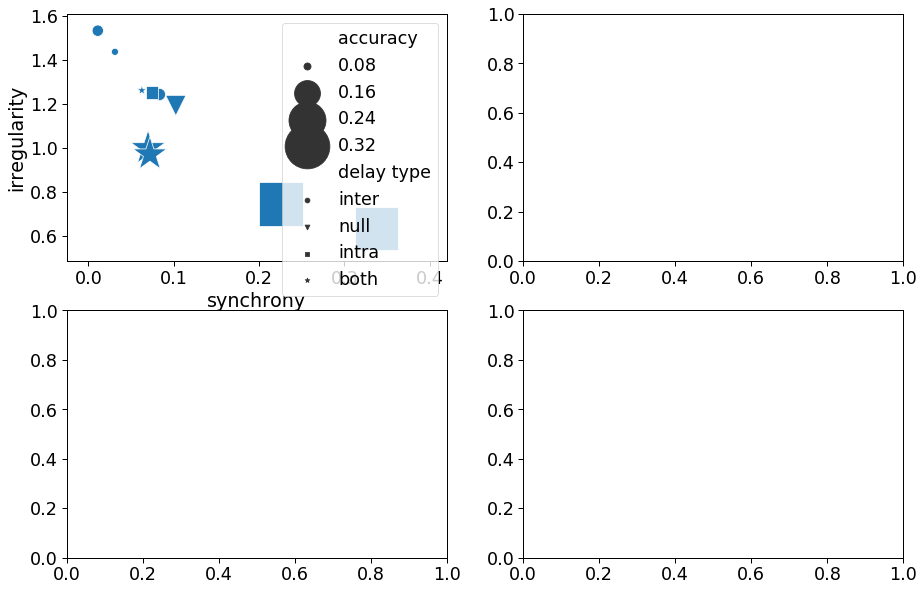

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2 ,figsize=(15,10))
sns.scatterplot(x='synchrony', y='irregularity', size='accuracy', style='delay type', data=selected,
                sizes=(50,2000), markers=['o','v','s','*'], ax=axes[0][0], legend='brief')
# plt.savefig('prototype.pdf', bbox_to_inches='tight')